# SENTIMENT ANALYSIS

**Sentiment analysis is a text mining technique that could extract emotions of a given text. It is mainly based on identifying positive, neutral and negative words and return a sentiment score. This technique is usually used on reviews or social media texts**

## Steps in Doing Sentiment Analysis

1. Import related libraries and dependencies

2. Import dataset

3. Cleaning dataset

4. Tokenizing dataset

5. Stemming dataset

6. Joining after tokenization and stemming

7. Analysis on the cleaned data


# Sentiment Analysis on Women'sCLothing Review Dataset

**Variables**:

- Clothing ID (numeric): specific piece being reviewed;
- Age (numeric): reviewers age;
- Title (text): title of the review;
- Review Text (text): review text;
- Rating (numeric): product score granted by the customer from 1 Worst, to 5 Best;
- Recommended IND (numeric): customer recommends the product where 1 is recommended, 0 is not recommended;
- Positive Feedback Count (numeric): number of other customers who found this review positive;
- Division Name (text): name of the product high level division;
- Department Name (text): name of the product department name;
- Class Name (text): name of the product class name.

**Importing libraries for Sentiment Analysis**

In [1]:
import string
import nltk
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from nltk.stem.porter import *

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,roc_curve,auc
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

The dataset consists of tweets that are labeled as pos tweets and neg tweets


In [4]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', header=0,index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses




**Exploratory Data analysis**


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.shape

(23486, 10)

In [7]:
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [8]:
df_text = df[['Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Age', 'Class Name', 'Department Name']]
#making the dataframe of imp fields
df_text.head() 

,Review Text,Rating,Recommended IND,Positive Feedback Count,Age,Class Name,Department Name
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,33,Intimates,Intimate
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses
2,I had such high hopes for this dress and reall...,3,0,0,60,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops


In [9]:
df_text = df_text.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"}) #renaming columns for simplification
df_text.head()

,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,33,Intimates,Intimate
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses
2,I had such high hopes for this dress and reall...,3,0,0,60,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops


In [10]:
df_text.isnull().sum() #printing the summ of null values in cloumns

Review                     845
Rating                       0
Recommended                  0
Positive Feedback Count      0
Age                          0
Class Name                  14
Department Name             14
dtype: int64

In [11]:
df_text.dropna(subset=['Review'], inplace=True)

In [12]:
df_text.isnull().sum()#printing the sum of null values in cloumns

Review                      0
Rating                      0
Recommended                 0
Positive Feedback Count     0
Age                         0
Class Name                 13
Department Name            13
dtype: int64

In [13]:
df_text['Department Name'].unique() #printing the uniques departs

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [14]:
df_text['Department Name'].value_counts() #sum of individuals

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [15]:
df_text['Rating'].value_counts() #ounting value in rating

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Distribution of Rating')

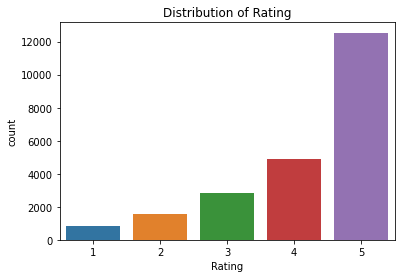

In [18]:
#visualizing the rating distribution using seaborn count
sns.countplot(x='Rating',data=df_text)
plt.title("Distribution of Rating")

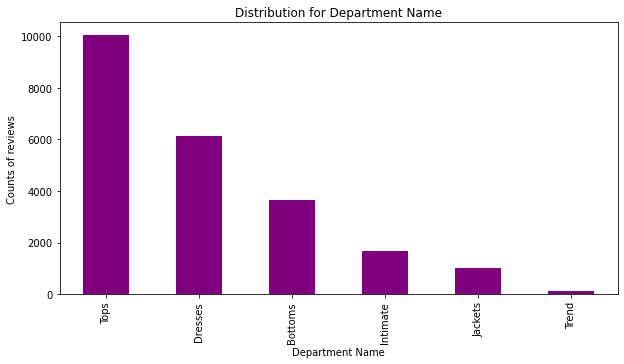

In [16]:
df_text['Department Name'].value_counts().plot(kind='bar', figsize = ((10,5)), color = 'purple',title='Distribution for Department Name')
plt.xlabel("Department Name")
plt.ylabel("Counts of reviews")
plt.show()

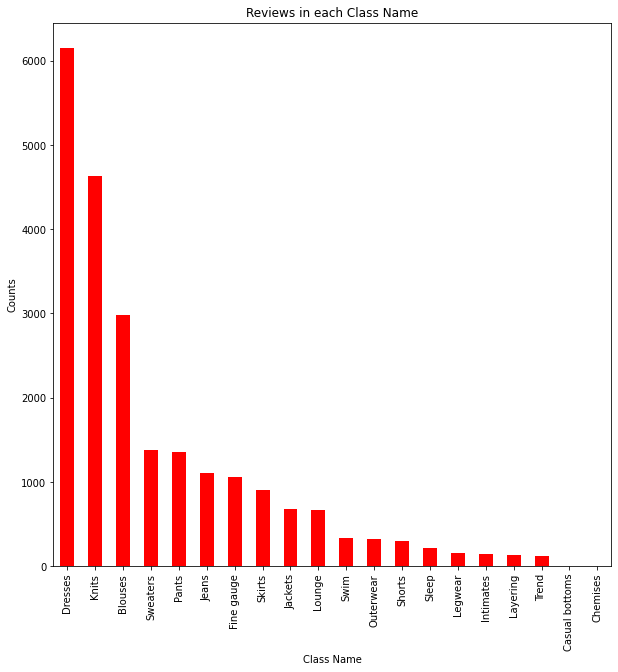

In [17]:
df_text['Class Name'].value_counts().plot(kind='bar',figsize = ((10,10)), color = 'red', title='Reviews in each Class Name')
plt.xlabel("Class Name")
plt.ylabel("Counts")
plt.show()

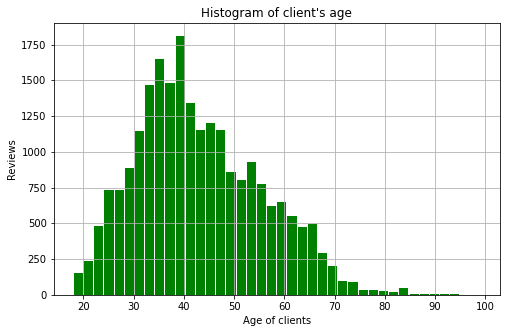

In [19]:
df_text["Age"].hist(bins = 40, figsize=(8,5), rwidth=0.9, color="green")
plt.xlabel("Age of clients")
plt.ylabel("Reviews")
plt.title("Histogram of client's age");

**Sentiment analysis**

In [20]:
review = df[['Rating', 'Recommended IND', 'Review Text']]
review.head()

,Rating,Recommended IND,Review Text
0,4,1,Absolutely wonderful - silky and sexy and comf...
1,5,1,Love this dress! it's sooo pretty. i happene...
2,3,0,I had such high hopes for this dress and reall...
3,5,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,5,1,This shirt is very flattering to all due to th...


In [21]:
#columns rename
review = review.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
review.head()

,Rating,Recommended,Review
0,4,1,Absolutely wonderful - silky and sexy and comf...
1,5,1,Love this dress! it's sooo pretty. i happene...
2,3,0,I had such high hopes for this dress and reall...
3,5,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,5,1,This shirt is very flattering to all due to th...


In [22]:
review.shape

(23486, 3)

In [ ]:
review.isnull().sum()

In [25]:
review.dropna(subset=['Review'], inplace=True)

In [26]:
review['Review'] = review['Review'].astype(str)

In [27]:
review['Recommended'].value_counts()

1    19314
0     4172
Name: Recommended, dtype: int64

Text(0.5, 1.0, 'Proportion')

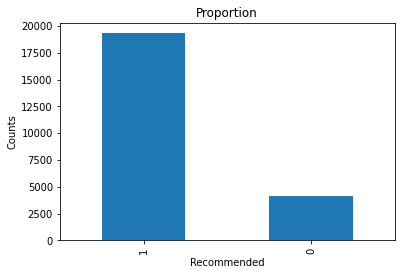

In [28]:
review["Recommended"].value_counts().plot(kind='bar')
plt.xlabel("Recommended")
plt.ylabel("Counts")
plt.title("Proportion")

In [29]:
#function to tokenize
def tokens(review):
    review = re.sub("[^a-zA-Z]"," ", review)
    text = review.lower().split()                   
    return " ".join(text)

In [30]:
review['Review_cleaned'] = review['Review'].apply(tokens)
review.head()

,Rating,Recommended,Review,Review_cleaned
0,4,1,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfor...
1,5,1,Love this dress! it's sooo pretty. i happene...,love this dress it s sooo pretty i happened to...
2,3,0,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...
3,5,1,"I love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit it s fun flirty...
4,5,1,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...


In [31]:
review['Review_cleaned'] = review['Review_cleaned'].astype(str) #converting to string

In [43]:
from nltk.corpus import stopwords

In [44]:
stop_words = stopwords.words('english')

In [45]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

In [46]:
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [47]:
review['Review_cleaned'] = review['Review_cleaned'].apply(stopwords)
review.head()

,Rating,Recommended,Review,Review_cleaned
0,4,1,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,5,1,Love this dress! it's sooo pretty. i happene...,love sooo pretty happened find store glad bc n...
2,3,0,I had such high hopes for this dress and reall...,high hopes really wanted work initially ordere...
3,5,1,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...
4,5,1,This shirt is very flattering to all due to th...,flattering due adjustable front tie perfect le...


In [48]:
def numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)

In [49]:
review['Review_cleaned'] = review['Review_cleaned'].apply(numbers)
review.head()

,Rating,Recommended,Review,Review_cleaned
0,4,1,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,5,1,Love this dress! it's sooo pretty. i happene...,love sooo pretty happened find store glad bc n...
2,3,0,I had such high hopes for this dress and reall...,high hopes really wanted work initially ordere...
3,5,1,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...
4,5,1,This shirt is very flattering to all due to th...,flattering due adjustable front tie perfect le...


In [54]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [55]:
from nltk.stem import *
#lemmatizing the text
lem = WordNetLemmatizer()
def lemmatize(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [56]:
review['Review_cleaned'] = review['Review_cleaned'].apply(lemmatize)
review.head()

,Rating,Recommended,Review,Review_cleaned
0,4,1,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,5,1,Love this dress! it's sooo pretty. i happene...,love sooo pretty happened find store glad bc n...
2,3,0,I had such high hopes for this dress and reall...,high hope really wanted work initially ordered...
3,5,1,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...
4,5,1,This shirt is very flattering to all due to th...,flattering due adjustable front tie perfect le...


In [57]:
positive = review[review.Recommended== 1]    #positive reviews
negative = review[review.Recommended== 0]    #negative reviews

In [58]:
positive.head()

,Rating,Recommended,Review,Review_cleaned
0,4,1,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,5,1,Love this dress! it's sooo pretty. i happene...,love sooo pretty happened find store glad bc n...
3,5,1,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...
4,5,1,This shirt is very flattering to all due to th...,flattering due adjustable front tie perfect le...
6,5,1,I aded this in my basket at hte last mintue to...,aded basket hte last mintue see would look lik...


In [59]:
negative.head()

,Rating,Recommended,Review,Review_cleaned
2,3,0,I had such high hopes for this dress and reall...,high hope really wanted work initially ordered...
5,2,0,"I love tracy reese dresses, but this one is no...",love tracy reese dress one petite foot tall us...
10,3,0,Dress runs small esp where the zipper area run...,run small esp zipper area run ordered sp typic...
22,2,0,"First of all, this is not pullover styling. th...",first pullover styling side zipper purchased k...
25,3,0,"Loved the material, but i didnt really look at...",loved didnt really look long purchased large m...


In [60]:
positive_words =[]

for review in positive.Review_cleaned:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)

In [61]:
negative_words = []

for review in negative.Review_cleaned:
    negative_words.append(review)
negative_words = ' '.join(negative_words)

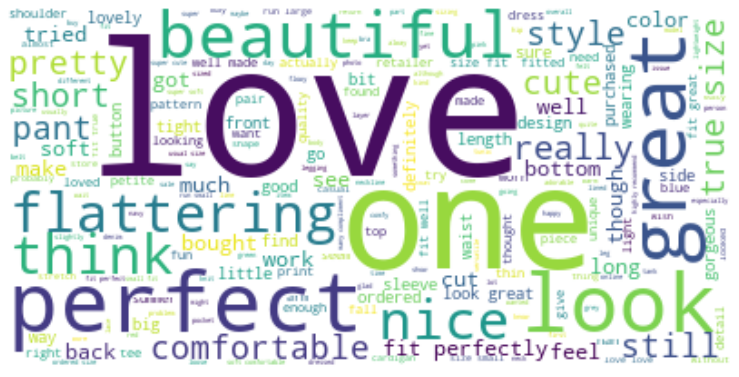

In [62]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

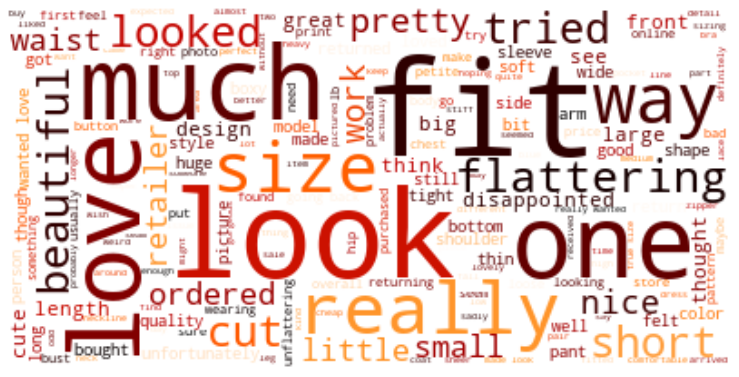

In [63]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis using VADER SENTIMENT

VADER (Valence Aware Dictionary for Sentiment Reasoning) is a kind of sentiment analysis based on the lexicon of words related to sentiment. In this method, each word is assessed whether it is positive, neutral or negative. In addition, the probability of assigning to each class is assessed.

In [64]:
text = df[['Rating', 'Recommended IND', 'Review Text']]
text.head()

,Rating,Recommended IND,Review Text
0,4,1,Absolutely wonderful - silky and sexy and comf...
1,5,1,Love this dress! it's sooo pretty. i happene...
2,3,0,I had such high hopes for this dress and reall...
3,5,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,5,1,This shirt is very flattering to all due to th...


In [65]:
text = text.rename(columns={"Review Text": "Review", "Recommended IND":"Recommended"})
text.head()

,Rating,Recommended,Review
0,4,1,Absolutely wonderful - silky and sexy and comf...
1,5,1,Love this dress! it's sooo pretty. i happene...
2,3,0,I had such high hopes for this dress and reall...
3,5,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,5,1,This shirt is very flattering to all due to th...


In [66]:
text.dropna(subset=['Review'], inplace=True)
text['Review'] = text['Review'].astype(str)

In [67]:
def rating(row):
    if row >= 4:
        return 'Positive'
    if row == 3:
        return 'Neutral'
    if row <= 2:
        return 'Negative'

In [68]:
text['Class'] = text['Rating'].apply(rating)
text.head()

,Rating,Recommended,Review,Class
0,4,1,Absolutely wonderful - silky and sexy and comf...,Positive
1,5,1,Love this dress! it's sooo pretty. i happene...,Positive
2,3,0,I had such high hopes for this dress and reall...,Neutral
3,5,1,"I love, love, love this jumpsuit. it's fun, fl...",Positive
4,5,1,This shirt is very flattering to all due to th...,Positive


In [69]:
text['Class'].value_counts()

Positive    17448
Neutral      2823
Negative     2370
Name: Class, dtype: int64

In [72]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

analyser = SentimentIntensityAnalyzer() #initializing analyser

def sentiment_scores(text):
    score = analyser.polarity_scores(text)
    print("{:-<40} {}".format(text, str(score)))



Positive, negative and neutral results represent the proportion of the text that falls in these categories. This means that review was rated as 79% neutral, 18% positive and 0.3% negative. All results should add up to 1.

The Compound score is a metric that calculates the sum of all lexicon scores that have been normalized between -1 (most extreme negative) and +1 (most extreme positive). Compound is 0.94, which means very high positive sentiment.


In [74]:
sentiment_scores(text['Review'].iloc[2])

I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c {'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'compound': 0.9427}


**Adding Score**

In [75]:
text['Scores'] = text['Review'].apply(lambda Review: analyser.polarity_scores(Review))
text.head()

,Rating,Recommended,Review,Class,Scores
0,4,1,Absolutely wonderful - silky and sexy and comf...,Positive,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp..."
1,5,1,Love this dress! it's sooo pretty. i happene...,Positive,"{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp..."
2,3,0,I had such high hopes for this dress and reall...,Neutral,"{'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'co..."
3,5,1,"I love, love, love this jumpsuit. it's fun, fl...",Positive,"{'neg': 0.226, 'neu': 0.34, 'pos': 0.434, 'com..."
4,5,1,This shirt is very flattering to all due to th...,Positive,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound..."


**Calculating Compound**

In [76]:
text['Compound'] = text['Scores'].apply(lambda score_dict: score_dict['compound'])
text.head()

,Rating,Recommended,Review,Class,Scores,Compound
0,4,1,Absolutely wonderful - silky and sexy and comf...,Positive,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp...",0.8932
1,5,1,Love this dress! it's sooo pretty. i happene...,Positive,"{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",0.9729
2,3,0,I had such high hopes for this dress and reall...,Neutral,"{'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'co...",0.9427
3,5,1,"I love, love, love this jumpsuit. it's fun, fl...",Positive,"{'neg': 0.226, 'neu': 0.34, 'pos': 0.434, 'com...",0.5727
4,5,1,This shirt is very flattering to all due to th...,Positive,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...",0.9291




Each review has a negative, neutral, positive and complex result.

The complex result is a comprehensive assessment of the first three points and this score is in the range of -1 to 1.

Based on these results, sentiment is determined.

If Compound is bigger than 0.5 the review is positive, from 0 to 0.5 is neutral and below than 0 is negative.


In [77]:
def sentiment (score):
    if score >= 0.5:
        return 'Positive'
    if (score > 0) and (score < 0.5):
        return 'Neutral'
    if score <= 0:
        return 'Negative'

In [78]:
text['Sentiment'] = text['Compound'].apply(sentiment)
text.head(10)

,Rating,Recommended,Review,Class,Scores,Compound,Sentiment
0,4,1,Absolutely wonderful - silky and sexy and comf...,Positive,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp...",0.8932,Positive
1,5,1,Love this dress! it's sooo pretty. i happene...,Positive,"{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",0.9729,Positive
2,3,0,I had such high hopes for this dress and reall...,Neutral,"{'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'co...",0.9427,Positive
3,5,1,"I love, love, love this jumpsuit. it's fun, fl...",Positive,"{'neg': 0.226, 'neu': 0.34, 'pos': 0.434, 'com...",0.5727,Positive
4,5,1,This shirt is very flattering to all due to th...,Positive,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...",0.9291,Positive
5,2,0,"I love tracy reese dresses, but this one is no...",Negative,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'comp...",0.9419,Positive
6,5,1,I aded this in my basket at hte last mintue to...,Positive,"{'neg': 0.023, 'neu': 0.881, 'pos': 0.096, 'co...",0.8004,Positive
7,4,1,"I ordered this in carbon for store pick up, an...",Positive,"{'neg': 0.046, 'neu': 0.901, 'pos': 0.053, 'co...",-0.0909,Negative
8,5,1,I love this dress. i usually get an xs but it ...,Positive,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.7175,Positive
9,5,1,"I'm 5""5' and 125 lbs. i ordered the s petite t...",Positive,"{'neg': 0.12, 'neu': 0.753, 'pos': 0.126, 'com...",-0.3724,Negative


In [79]:
text['Sentiment'].value_counts()

Positive    19119
Neutral      1947
Negative     1575
Name: Sentiment, dtype: int64

**Checking Accuracy**

In [80]:
accuracy_score(text['Class'],text['Sentiment'])

0.7622454838567201

**Classification Report**



Precision — What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

Recall — What percent of the positive cases did you catch?

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.

F1 score — What percent of positive predictions were correct?

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2(Recall Precision) / (Recall + Precision)

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.


In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
print(classification_report(text['Class'],text['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.43      0.28      0.34      2370
     Neutral       0.27      0.19      0.22      2823
    Positive       0.84      0.92      0.88     17448

    accuracy                           0.76     22641
   macro avg       0.51      0.46      0.48     22641
weighted avg       0.73      0.76      0.74     22641



**Confusion Matrix**

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [85]:
print(confusion_matrix(text['Class'],text['Sentiment']))

[[  675   492  1203]
 [  440   525  1858]
 [  460   930 16058]]




Fit has achieved 76% accuracy.

The results show different sentiment distribution.

The Vader method assigned more positive reviews than original rating so the amount of neutral and negative reviews reduced.


# TEXT BLOB

TextBlob is a python library that offers a simple API to access its methods to perform various NLP tasks. The sentiment function of textblob can assign polarity to words and estimate the sentiment of the whole text as an average. It returns two properties: polarity and subjectivity.

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is the emotion expressed in the sentence. It can be positive, neagtive and neutral.The polarity score is a float within the range [-1.0, 1.0] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion or emotion whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].


In [86]:
data = text[['Review', 'Class']]
data.head()

,Review,Class
0,Absolutely wonderful - silky and sexy and comf...,Positive
1,Love this dress! it's sooo pretty. i happene...,Positive
2,I had such high hopes for this dress and reall...,Neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive
4,This shirt is very flattering to all due to th...,Positive


In [87]:
blob_text = data['Review'][0]
blob_text

'Absolutely wonderful - silky and sexy and comfortable'

In [89]:
from textblob import TextBlob

In [90]:
blob = TextBlob(blob_text)
print(format(blob.sentiment))

Sentiment(polarity=0.6333333333333333, subjectivity=0.9333333333333332)




The above result is a tuple representing the polarization and subjectivity of review.

The polarity of the sentence is 0.63, indicating that the sentiment is positive.

The subjectivity of the text which is 0.93 in our example. The value closer to 1 indicates that the sentence is mostly a public opinion and not a factual piece of information and vice versa.


In [91]:
data['Polarity'] = data['Review'].apply(lambda x: TextBlob(x).sentiment[0])
data.head(10)

,Review,Class,Polarity
0,Absolutely wonderful - silky and sexy and comf...,Positive,0.633333
1,Love this dress! it's sooo pretty. i happene...,Positive,0.339583
2,I had such high hopes for this dress and reall...,Neutral,0.073675
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,0.550000
4,This shirt is very flattering to all due to th...,Positive,0.512891
5,"I love tracy reese dresses, but this one is no...",Negative,0.178750
6,I aded this in my basket at hte last mintue to...,Positive,0.133750
7,"I ordered this in carbon for store pick up, an...",Positive,0.171635
8,I love this dress. i usually get an xs but it ...,Positive,0.002500
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",Positive,0.204200


In [92]:


def sentiment_score(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity > 0:
        return "Positive"
    else:
        return "Neutral"



In [93]:
data['Sentiment'] = data['Polarity'].apply(sentiment_score)
data.head(10)

,Review,Class,Polarity,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,Positive,0.633333,Positive
1,Love this dress! it's sooo pretty. i happene...,Positive,0.339583,Positive
2,I had such high hopes for this dress and reall...,Neutral,0.073675,Positive
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,0.550000,Positive
4,This shirt is very flattering to all due to th...,Positive,0.512891,Positive
5,"I love tracy reese dresses, but this one is no...",Negative,0.178750,Positive
6,I aded this in my basket at hte last mintue to...,Positive,0.133750,Positive
7,"I ordered this in carbon for store pick up, an...",Positive,0.171635,Positive
8,I love this dress. i usually get an xs but it ...,Positive,0.002500,Positive
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",Positive,0.204200,Positive


In [94]:
data['Sentiment'].value_counts()

Positive    21227
Negative     1322
Neutral        92
Name: Sentiment, dtype: int64

In [95]:
data.loc[data['Sentiment'] == 'Negative'].head()

,Review,Class,Polarity,Sentiment
10,Dress runs small esp where the zipper area run...,Neutral,-0.097149,Negative
14,This is a nice choice for holiday gatherings. ...,Neutral,-0.057143,Negative
22,"First of all, this is not pullover styling. th...",Negative,-0.045595,Negative
44,Tried this on today at my local retailer and h...,Positive,-0.046374,Negative
72,I have a short torso and this works well for m...,Positive,-0.079365,Negative


In [96]:
data.loc[data['Sentiment'] == 'Positive'].head()

,Review,Class,Polarity,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,Positive,0.633333,Positive
1,Love this dress! it's sooo pretty. i happene...,Positive,0.339583,Positive
2,I had such high hopes for this dress and reall...,Neutral,0.073675,Positive
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,0.550000,Positive
4,This shirt is very flattering to all due to th...,Positive,0.512891,Positive


In [97]:
data.loc[data['Sentiment'] == 'Neutral'].head()

,Review,Class,Polarity,Sentiment
28,I have several of goodhyouman shirts and i get...,Positive,0.0,Neutral
104,"Runs big and looked unflattering. i am petite,...",Negative,0.0,Neutral
751,"Can be a bit itchy sometimes, i guess dependin...",Positive,0.0,Neutral
897,I like the skirt. that said it is going to the...,Positive,0.0,Neutral
976,I was initially attracted to the colors,Positive,0.0,Neutral


In [98]:
accuracy_score(data['Class'],data['Sentiment'])

0.7731990636455986

In [99]:
print(classification_report(data['Class'],data['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.41      0.23      0.29      2370
     Neutral       0.16      0.01      0.01      2823
    Positive       0.80      0.97      0.88     17448

    accuracy                           0.77     22641
   macro avg       0.46      0.40      0.39     22641
weighted avg       0.68      0.77      0.71     22641

